Create Sorted Category List
===

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!ls data

lgbt_history_pages.tsv	page.tsv


In [4]:
page_df = pd.read_csv('data/page.tsv', sep='\t')
len(page_df)

9485287

In [5]:
page_df.sample(n=1)

,page_id,wiki_namespace,page_title,is_redirect,rev_count
1303105,7083016,0,Han Dayuan,0,2


In [12]:
cat_df = pd.read_csv('data/lgbt_history_pages.tsv', sep='\t')
len(cat_df)

18578

In [13]:
cat_df.sample(n=1)

,page_id,parent_category,depth
711,41006017,LGBT_history_in_Australia,2


In [14]:
df = cat_df.merge(page_df, on='page_id', how='inner', validate='one_to_one')
len(df)

14595

In [15]:
df.sample(n=1)

,page_id,parent_category,depth,wiki_namespace,page_title,is_redirect,rev_count
11372,25867813,2000s_LGBT_literature,5,0,What Did You Eat Yesterday?,0,72


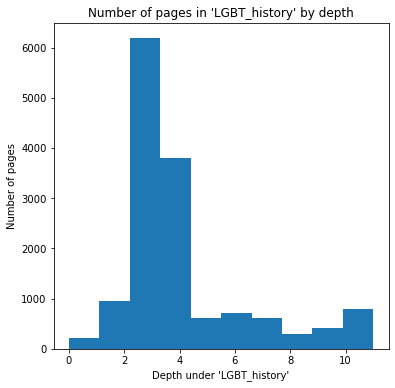

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.hist(df.depth)
ax.set_title("Number of pages in 'LGBT_history' by depth")
ax.set_xlabel("Depth under 'LGBT_history'")
ax.set_ylabel("Number of pages")

plt.show()

In [20]:
df.parent_category.value_counts().head()

20th-century_LGBT_people                               2550
21st-century_LGBT_people                               2236
LGBT_rights_activists_from_the_United_States            652
2010s_American_LGBT-related_drama_television_series     170
2015_LGBT-related_films                                 102
Name: parent_category, dtype: int64

In [30]:
cat_counts = df.parent_category.value_counts().reset_index(name='num_pages').rename(columns={'index': 'category'})
cat_counts.to_csv('data/cat_counts.tsv', sep='\t')
cat_counts.head(n=10)

,category,num_pages
0,20th-century_LGBT_people,2550
1,21st-century_LGBT_people,2236
2,LGBT_rights_activists_from_the_United_States,652
3,2010s_American_LGBT-related_drama_television_s...,170
4,2015_LGBT-related_films,102
5,Transgender_rights_activists,99
6,2016_LGBT-related_films,98
7,2014_LGBT-related_films,98
8,2017_LGBT-related_films,96
9,2018_LGBT-related_films,89


In [32]:
df = df.sort_values(by='rev_count', ascending=False)
df.head(n=10)

,page_id,parent_category,depth,wiki_namespace,page_title,is_redirect,rev_count
9632,50733124,2019_LGBT-related_films,4,0,It Chapter Two,0,2214
1978,56609437,2019_in_LGBT_history,3,0,RuPaul's Drag Race (season 11),0,1806
13456,53470508,Game_of_Thrones_seasons,9,0,Game of Thrones (season 8),0,1748
9535,54978069,2018_LGBT-related_films,4,0,Bohemian Rhapsody (film),0,1517
10893,54885332,LGBT_rights_activists_from_the_United_States,4,0,Alexandria Ocasio-Cortez,0,1426
1971,57960290,2018_in_LGBT_history,3,0,RuPaul's Drag Race All Stars (season 4),0,1381
1979,61888185,2019_in_LGBT_history,3,0,RuPaul's Drag Race UK (series 1),0,1179
9655,57172797,2019_LGBT-related_films,4,0,Rocketman (film),0,1137
10408,415036,LGBT_rights_activists_from_the_United_Kingdom,4,0,Jeremy Corbyn,0,1046
3480,60292990,20th-century_LGBT_people,3,0,Lil Nas X,0,994


In [33]:
df.head(n=500).to_csv('data/lgbt_history_pages_by_rev_count.tsv', sep='\t')